# Channing_house_analysis

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats
from scipy.stats import skew, t


data = pd.read_csv('channing.csv')

In [10]:
data.head()

,sex,entry,exit,time,status
0,male,782,909,127,1
1,male,1020,1128,108,1
2,male,856,969,113,1
3,male,915,957,42,1
4,male,863,983,120,1


In [29]:
# analysis for the variable age at the time of entrance and exit
data['age_at_entry_years'] = data['entry'] / 12
data['age_at_exit_years'] = data['exit'] / 12
# average age
mean_age = data['age_at_entry_years'].mean()

### overall analysis of the dataset

In [28]:
# Basic descriptive statistics
print("Basic age statistics at the time of moving in:")
print(data['age_at_entry_years'].describe())

print("\nBasic age statistics at the time of moving out:")
print(data['age_at_exit_years'].describe())

Basic age statistics at the time of moving in:
count    462.000000
mean      75.489899
std        5.776572
min       61.083333
25%       71.166667
50%       75.041667
75%       79.666667
max       95.000000
Name: age_at_entry_years, dtype: float64

Basic age statistics at the time of moving out:
count    462.000000
mean      82.166126
std        6.147330
min       64.750000
25%       78.250000
50%       82.500000
75%       85.916667
max      100.583333
Name: age_at_exit_years, dtype: float64


#### At the time of moving in, the average age of the individuals was approximately 75.49 years (with a standard deviation of 5.78 years). The youngest person in the group was 61, while the oldest was 95 years old. The 25th percentile (first quartile) indicates that 25% of the individuals were 71 years old or younger, the 50th percentile (second quartile or median) suggests that half of the individuals were 75 years old or younger, and the 75th percentile (third quartile) shows that 75% of the individuals were 79 years old or younger at the time of moving in.

#### At the time of moving out, the average age of the individuals was approximately 82 years, with a standard deviation of 6.15 years. The youngest person at the time of moving out was 64 years old, while the oldest was 100 years old. Similar to the age at moving in, the 25th percentile indicates that 25% of the individuals were 78 years old or younger, the 50th percentile suggests that half of the individuals were 82 years old or younger, and the 75th percentile shows that 75% of the individuals were 85 years old or younger at the time of moving out.

#### This data provides valuable insights into the age distribution of individuals when they entered and exited the Channing House, helping to understand the population's age dynamics during this period.






### Graphs for age analysis

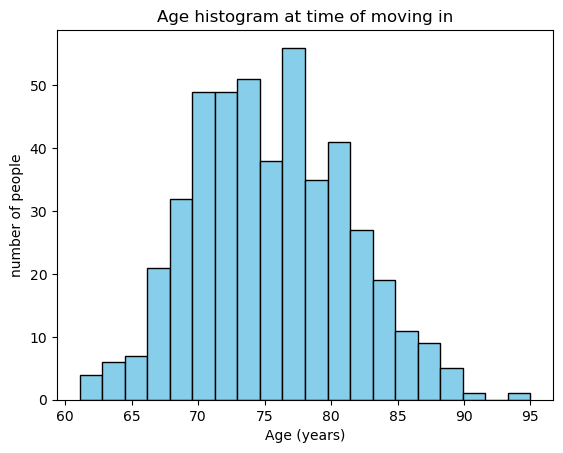

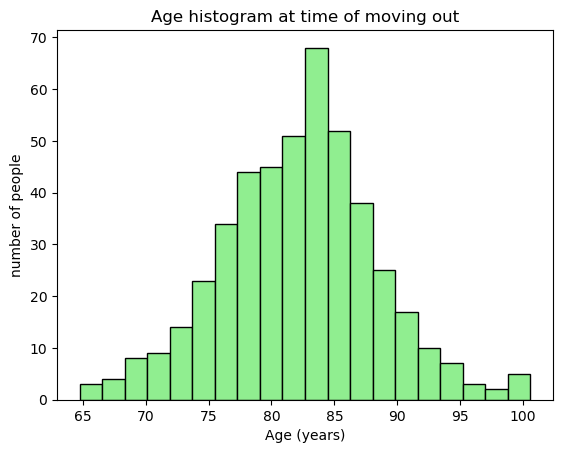

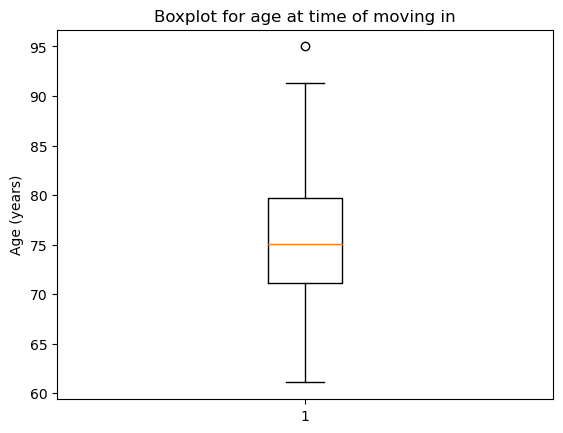

In [30]:
# Age histogram at time of moving in
plt.hist(data['age_at_entry_years'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age histogram at time of moving in')
plt.xlabel('Age (years)')
plt.ylabel('number of people')
plt.show()

# Age histogram at time of moving out
plt.hist(data['age_at_exit_years'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age histogram at time of moving out')
plt.xlabel('Age (years)')
plt.ylabel('number of people')
plt.show()

# boxplot at time of moving in
plt.boxplot(data['age_at_entry_years'])
plt.title('Boxplot for age at time of moving in')
plt.ylabel('Age (years)')
plt.show()

In [31]:
# Correlation analysis between age at entry, age of departure, length of stay, and status
correlation_matrix = data[['entry', 'exit', 'time']].corr()
print("\nCorrelaton matrix:")
print(correlation_matrix)


Correlaton matrix:
          entry      exit      time
entry  1.000000  0.770778 -0.254700
exit   0.770778  1.000000  0.416753
time  -0.254700  0.416753  1.000000


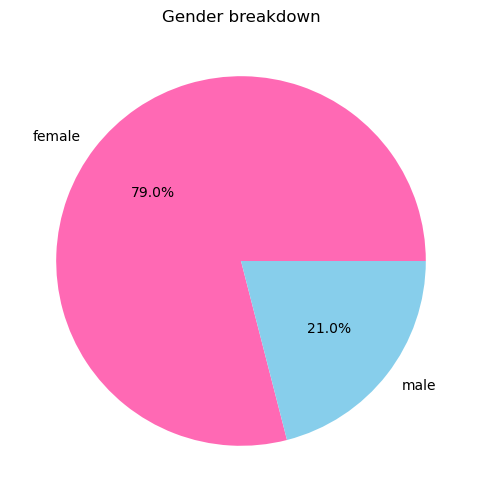

In [32]:
# Counting the number of each sex in the set
gender_counts = data['sex'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['hotpink', 'skyblue'])
plt.title('Gender breakdown')
plt.show()

## "Test the hypothesis that the expected age for women to move into a retirement home is 74 years." 
### Create confidence intervals for the expected age. Is 74 belongs to this range?

In [16]:
print(mean_age)

75.48989898989898


In [17]:
# selecting female data only (sex == 'female')
data_female = data[data['sex'] == 'female']

In [18]:
# average age
mean_age_female = data_female['age_at_entry_years'].mean()

In [19]:
print(mean_age_female)

75.2230593607306


In [20]:
# number of observations
n = len(data_female)

In [21]:
# standard deviation
std_dev_age = data_female['age_at_entry_years'].std()

In [22]:
# Calculation of the confidence intervals for the expected age (assuming a confidence level of 95%)
confidence_interval = t.interval(0.95, n - 1, loc=mean_age, scale=std_dev_age / np.sqrt(n))


In [23]:
print("Average moving age for women:", mean_age)
print("Standard Deviation:", std_dev_age)
print("Confidence intervals:", confidence_interval)

Average moving age for women: 75.48989898989898
Standard Deviation: 5.700913689633422
Confidence intervals: (74.90309568414479, 76.07670229565316)


In [40]:
# Statistic of T-test
t_statistic = (mean_age_female - 74) / (std_dev_age / np.sqrt(n))

degrees_freedom = n - 1
alpha = 0.05

# critical value
critical_value = stats.t.ppf(1 - alpha / 2, degrees_freedom)

# comparison of statistics with critical value
if abs(t_statistic) > critical_value:
    result = "Rejection of the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# results
print("T-Statistic:", t_statistic)
print("Critical Value:", critical_value)
print("Result:", result)







T-Statistic: 4.611307224590075
Critical Value: 1.9651232162743544
Result: Rejection of the null hypothesis


The calculated t-statistic (4.611) would have been greater than the critical value (1.965), 
indicating a significant difference between the observed data and the expected age of 74 years for women moving into a quiet old-age house. 
This rejection of the null hypothesis would imply that there is evidence to suggest that the average age at which women move into such a facility is different from 74 years.
In simpler terms, the data would have provided enough support to conclude that the expected age for women to move into a quiet old-age house is not 74 years, and there could be a significant difference in the actual average age.

### Find the estimator of the skewness coefficient for the variable describing the age of the senior and the appropriate confidence interval for this coefficient. 
### At a significance level of 5%, can we say that the distribution of the age variable is symmetrical? 
#### Hint: having confidence intervals at a certain confidence level, running a test can mean checking if 0 is within the range.

In [41]:
# the skewness coefficient estimator
skewness = skew(data['entry'])

# Numbers of observations
n = len(data['entry'])

# Calculation of the standard deviation of the skewness coefficient estimator
std_err = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))

# Calculation of the confidence interval for the skewness factor (assuming a confidence level of 95%)
confidence_interval = t.interval(0.95, n - 1, loc=skewness, scale=std_err)

print("Skewness coefficient estimator:", skewness)
print("Confidence interval:", confidence_interval)

Skewness coefficient estimator: 0.2084375677039889
Confidence interval: (-0.014061069650797259, 0.43093620505877506)


### At the significance level of 5% we can accept the hypothesis that the distribution of the variable is symmetrical